# Geographical Data

Today we delve into the fascinating subject of geographical data:

- What forms it takes.
- How to manipulate it.
- How to plot it.

## Why Geographical Data?

Geographical data is ubiquitous in applied economics:

- Very useful for some types of analysis.
- Important to know how to do some nice visualisations
- Widely accessible as most of it is open data.

## What forms it takes

In general, you'll find two types of geographical data:

- Vector data:
    - Shapefiles.
    - GeoJSON.
- raster.

## Vector Data

Vector data is any of the following data:

- Points on a map.
- Lines on a map.
- Polygons on a map.

In python, you manipulate this data with a package named geopandas.

### Formats of vector data:

- Shapefiles:
    - Actually several files that compose a shapefile
- GeoJSON
- GeoPackages

For us they are all the same and you don't really need to learn anything about the specificities of each.

We've already encountered vector data in this class for Italy:

- A shapefile is not contained within only one file:
    - You have to keep it stored with a bunch of other files.
    
Let's learn by example.

In [ ]:
!pip install geopandas

In [4]:
print(dataset)

NAME     ADM0NAME  POP_MAX  \
0     Colonia del Sacramento      Uruguay    21714   
1                   Trinidad      Uruguay    21093   
2                Fray Bentos      Uruguay    23279   
3                  Canelones      Uruguay    19698   
4                    Florida      Uruguay    32234   
...                      ...          ...      ...   
7337               Cambridge  New Zealand    15192   
7338                Kerikeri  New Zealand     5856   
7339                 Turangi  New Zealand     3240   
7340                     Leh        India    30870   
7341               Amaravati        India  5800000   

                         geometry  
0     POINT (-57.83612 -34.46979)  
1     POINT (-56.90100 -33.54400)  
2     POINT (-58.30400 -33.13900)  
3     POINT (-56.28400 -34.53800)  
4     POINT (-56.21500 -34.09900)  
...                           ...  
7337  POINT (175.47027 -37.88943)  
7338  POINT (173.95067 -35.22848)  
7339  POINT (175.81424 -38.98889)  
7340    POINT (77.57229 34.16156)  
7341    POINT (80.52432 16.53366)  

[7342 rows x 4 columns]

In [3]:
import geopandas as gpd

dataset = gpd.read_file("cities/")

We can very easily plot this kind of data, `geopandas` and `matplotlib` take care of everything for us

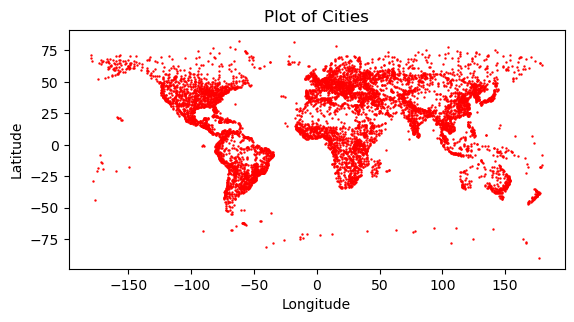

In [5]:
import matplotlib.pyplot as plt
# Plot the shapefile
dataset.plot(marker='o', color='red', markersize=0.5)

# Customize the plot (optional)
plt.title('Plot of Cities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

With `geopandas`, python treats vector data as if it were a normal pandas dataframe:

- Which means you can do everything you would do in `pandas`

In [4]:
dataset

NAME     ADM0NAME  POP_MAX  \
0     Colonia del Sacramento      Uruguay    21714   
1                   Trinidad      Uruguay    21093   
2                Fray Bentos      Uruguay    23279   
3                  Canelones      Uruguay    19698   
4                    Florida      Uruguay    32234   
...                      ...          ...      ...   
7337               Cambridge  New Zealand    15192   
7338                Kerikeri  New Zealand     5856   
7339                 Turangi  New Zealand     3240   
7340                     Leh        India    30870   
7341               Amaravati        India  5800000   

                         geometry  
0     POINT (-57.83612 -34.46979)  
1     POINT (-56.90100 -33.54400)  
2     POINT (-58.30400 -33.13900)  
3     POINT (-56.28400 -34.53800)  
4     POINT (-56.21500 -34.09900)  
...                           ...  
7337  POINT (175.47027 -37.88943)  
7338  POINT (173.95067 -35.22848)  
7339  POINT (175.81424 -38.98889)  
7340    POINT (77.57229 34.16156)  
7341    POINT (80.52432 16.53366)  

[7342 rows x 4 columns]

We can filter for Italian cities

In [6]:
ita_data = dataset.loc[dataset['ADM0NAME'] == 'Italy',:].copy()

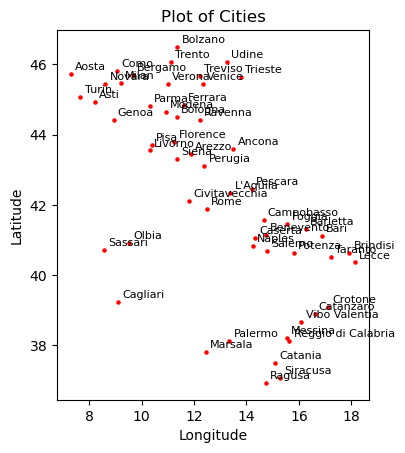

In [7]:
# Create the plot
fig, ax = plt.subplots()
ita_data.plot(ax=ax, marker='o', color='red', markersize=5)

# Add labels for each point
for x, y, label in zip(ita_data.geometry.x, ita_data.geometry.y, ita_data['NAME']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points', fontsize=8)

# Customize the plot (optional)
ax.set_title('Plot of Cities')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

Then, in terms of visualization, you can create any column you'd like, and represent it using plotting

In [8]:
import numpy as np
ita_data['size_dot'] = ita_data['POP_MAX']/10000

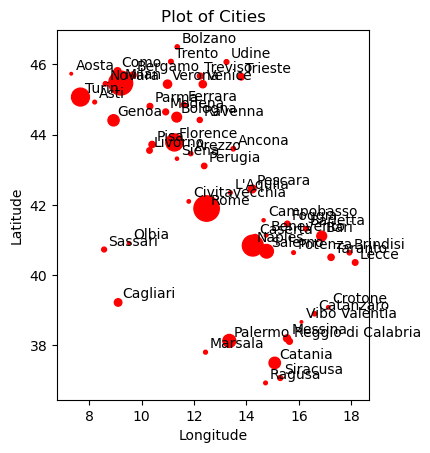

In [8]:
# Create the plot
fig, ax = plt.subplots()
ita_data.plot(ax=ax, marker='o', color='red', markersize=ita_data['size_dot'])


# Add labels for each point
for x, y, label, size in zip(ita_data.geometry.x, ita_data.geometry.y, ita_data['NAME'], ita_data['size_dot']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points')

# Customize the plot (optional)
ax.set_title('Plot of Cities')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

Again, as we're using something very similar to `pandas`, we can easily treat that object

In [10]:
ita_data['size_font'] = ita_data['size_dot'].apply(lambda x: 8 if x > 100 else 0)

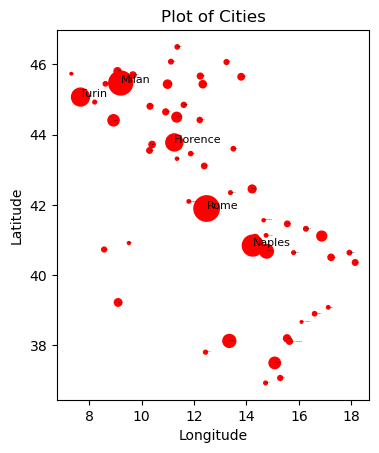

In [11]:
# Create the plot
fig, ax = plt.subplots()
ita_data.plot(ax=ax, marker='o', color='red', markersize=ita_data['size_dot'])


# Add labels for each point
for x, y, label, size in zip(ita_data.geometry.x, ita_data.geometry.y, ita_data['NAME'], ita_data['size_font']):
    ax.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=size)

# Customize the plot (optional)
ax.set_title('Plot of Cities')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

It's quite easy to print that map to HTML so we can look at it more closely

In [ ]:
!pip install folium

In [12]:
pwd

'C:\\Users\\anato\\Documents\\travail\\courses\\python-for-economist\\class9'

In [11]:
import folium

# Calculate the center of the map
center = 0, 0

# Create a Folium map centered on the data
m = folium.Map(location=center, zoom_start=10)

# Add points to the map
for _, row in ita_data.iterrows():
    folium.Marker(location=[row.geometry.y, row.geometry.x]).add_to(m)

# Save the map to an HTML file
m.save('C:/Users/anato/Documents/map.html')


You can merge that data with normal `pandas` data you could find on ISTAT or anywhere else. The possibilities are endless.

In [13]:
ita_data

NAME ADM0NAME  POP_MAX                   geometry  \
252              Potenza    Italy    69060  POINT (15.79900 40.64200)   
253           Campobasso    Italy    50762  POINT (14.65600 41.56300)   
257                Aosta    Italy    34062   POINT (7.31500 45.73700)   
1201              Modena    Italy   175502  POINT (10.91999 44.65003)   
1202             Crotone    Italy    60010  POINT (17.12334 39.08334)   
1203       Vibo Valentia    Italy    33957  POINT (16.10004 38.66659)   
1204  Reggio di Calabria    Italy   180353  POINT (15.64136 38.11500)   
1205             Caserta    Italy   250000  POINT (14.33736 41.05996)   
1206            Barletta    Italy   107830  POINT (16.27000 41.32000)   
1207              Ragusa    Italy    68956  POINT (14.72999 36.93003)   
1211                Asti    Italy    71276   POINT (8.20998 44.92998)   
1212              Novara    Italy   100910   POINT (8.61998 45.45000)   
1213                Como    Italy   250000   POINT (9.08000 45.81001)   
1214               Udine    Italy   119009  POINT (13.24001 46.07002)   
1215             Treviso    Italy   177309  POINT (12.24002 45.67001)   
3356               Parma    Italy   166011  POINT (10.32003 44.81043)   
3357             Ravenna    Italy   134631  POINT (12.22002 44.42038)   
3358             Ferrara    Italy   130992  POINT (11.60993 44.85043)   
3359             Bologna    Italy   488172  POINT (11.34002 44.50042)   
3360               Olbia    Italy    45366   POINT (9.51507 40.91428)   
3361            Cagliari    Italy   291511   POINT (9.10398 39.22240)   
3362                Pisa    Italy   203336  POINT (10.40003 43.72047)   
3363             Livorno    Italy   156274  POINT (10.30227 43.55113)   
3364               Siena    Italy    52625  POINT (11.34999 43.31703)   
3365              Arezzo    Italy    91589  POINT (11.87498 43.46173)   
3366           Catanzaro    Italy    95251  POINT (16.60001 38.90038)   
3367             Salerno    Italy   954265  POINT (14.76994 40.68040)   
3368           Benevento    Italy    61791  POINT (14.74999 41.13370)   
3369                Bari    Italy   500577  POINT (16.87276 41.11422)   
3370              Foggia    Italy   155203  POINT (15.55997 41.46048)   
3371               Lecce    Italy   162582  POINT (18.14999 40.36039)   
3372            Brindisi    Italy   104437  POINT (17.93001 40.64035)   
3373             Taranto    Italy   202033  POINT (17.23000 40.50839)   
3374             Messina    Italy   252026  POINT (15.55000 38.20047)   
3375             Marsala    Italy    77784  POINT (12.43866 37.80540)   
3376            Siracusa    Italy   123657  POINT (15.28996 37.07036)   
3377             Pescara    Italy   314789  POINT (14.21866 42.45543)   
3378            L'Aquila    Italy    68503  POINT (13.39002 42.35040)   
3379       Civitavecchia    Italy    61316  POINT (11.79999 42.10041)   
3380              Ancona    Italy   100507  POINT (13.49994 43.60037)   
3381             Perugia    Italy   149125  POINT (12.38998 43.11038)   
3386             Bergamo    Italy   200000   POINT (9.66999 45.70040)   
3387             Trieste    Italy   216035  POINT (13.80003 45.65038)   
3388             Bolzano    Italy    95895  POINT (11.36002 46.50043)   
3389              Trento    Italy   107808  POINT (11.11998 46.08043)   
3390              Verona    Italy   347459  POINT (10.99002 45.44039)   
5171             Sassari    Italy   120729   POINT (8.57001 40.73001)   
5172               Turin    Italy  1652000   POINT (7.66801 45.07233)   
5804               Genoa    Italy   647497   POINT (8.93004 44.40999)   
6451            Florence    Italy  1500000  POINT (11.25000 43.78000)   
6452             Catania    Italy   674542  POINT (15.08000 37.49997)   
6684              Venice    Italy   270816  POINT (12.33500 45.43866)   
6919             Palermo    Italy   863000  POINT (13.34808 38.12697)   
7145              Naples    Italy  2250000  POINT (14.24307 40.84197)   
7146 

Shapefiles can also take other forms:

- Lines
- Polygons

Let's do lines now, and the most popular kind of objects:

- Roads
- Railways

Let's directly have a look at some roads, can you guess where this is?

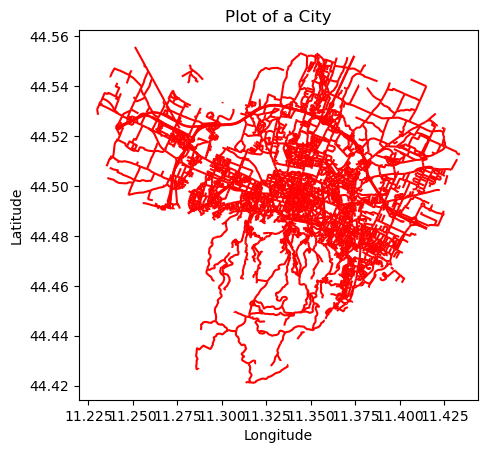

In [14]:
dataset = gpd.read_file(r"roads/")

# Plot the shapefile
dataset.plot(marker='o', color='red', markersize=0.5)

# Customize the plot (optional)
plt.title('Plot of a City')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

Let's zoom in to make things more recognizable

In [15]:
dataset

name  length  \
0                    VIA GIUSEPPE SARAGAT   133.0   
1     TANGENZIALE CASALECCHIO-SAN LAZZARO   656.0   
2                        VIA LUIGI VESTRI   112.0   
3                    VIA LEOPOLDO FREGOLI    52.0   
4                  VIALE DELLA REPUBBLICA   241.0   
...                                   ...     ...   
7974                     VIA ANDREA COSTA   168.0   
7975           VIA EVANGELISTA TORRICELLI    67.0   
7976                  VIA CORIOLANO VIGHI    33.0   
7977                  VIA CORIOLANO VIGHI   144.0   
7978                     VIA BRUNO BUOZZI    87.0   

                                               geometry  
0     LINESTRING (11.30289 44.49916, 11.30325 44.499...  
1     LINESTRING (11.36002 44.52449, 11.35908 44.524...  
2     LINESTRING (11.35772 44.50689, 11.35677 44.506...  
3     LINESTRING (11.35787 44.50503, 11.35793 44.505...  
4     LINESTRING (11.36027 44.50725, 11.36057 44.506...  
...                                                 ...  
7974  LINESTRING (11.31084 44.49396, 11.31124 44.494...  
7975  LINESTRING (11.28331 44.49431, 11.28250 44.49445)  
7976  LINESTRING (11.28286 44.49735, 11.28321 44.49719)  
7977  LINESTRING (11.28286 44.49735, 11.28223 44.497...  
7978  LINESTRING (11.28584 44.49656, 11.28690 44.49636)  

[7979 rows x 3 columns]

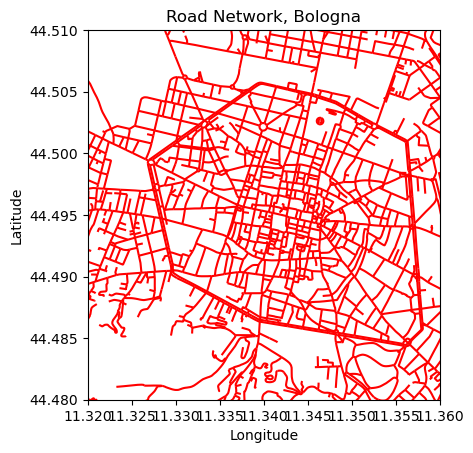

In [14]:
# Create the plot
fig, ax = plt.subplots()

# Plot the shapefile
dataset.plot(ax = ax, marker='o', color='red', markersize=0.5)

# Customize the plot (optional)
ax.set_title('Road Network, Bologna')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Set the x and y axis limits to zoom in on the specified region
ax.set_xlim([11.32, 11.36])
ax.set_ylim([44.48, 44.51])

# Show the plot
plt.show()

Have a look at what the dataset is made of:

- LineString objects, no longer points.

In [15]:
dataset

name  length  \
0                    VIA GIUSEPPE SARAGAT   133.0   
1     TANGENZIALE CASALECCHIO-SAN LAZZARO   656.0   
2                        VIA LUIGI VESTRI   112.0   
3                    VIA LEOPOLDO FREGOLI    52.0   
4                  VIALE DELLA REPUBBLICA   241.0   
...                                   ...     ...   
7974                     VIA ANDREA COSTA   168.0   
7975           VIA EVANGELISTA TORRICELLI    67.0   
7976                  VIA CORIOLANO VIGHI    33.0   
7977                  VIA CORIOLANO VIGHI   144.0   
7978                     VIA BRUNO BUOZZI    87.0   

                                               geometry  
0     LINESTRING (11.30289 44.49916, 11.30325 44.499...  
1     LINESTRING (11.36002 44.52449, 11.35908 44.524...  
2     LINESTRING (11.35772 44.50689, 11.35677 44.506...  
3     LINESTRING (11.35787 44.50503, 11.35793 44.505...  
4     LINESTRING (11.36027 44.50725, 11.36057 44.506...  
...                                                 ...  
7974  LINESTRING (11.31084 44.49396, 11.31124 44.494...  
7975  LINESTRING (11.28331 44.49431, 11.28250 44.49445)  
7976  LINESTRING (11.28286 44.49735, 11.28321 44.49719)  
7977  LINESTRING (11.28286 44.49735, 11.28223 44.497...  
7978  LINESTRING (11.28584 44.49656, 11.28690 44.49636)  

[7979 rows x 3 columns]

A lot of interesting things can be done combining `Points` and `Lines`, for example distance analysis along the network of lines.

- In many works, it can be interesting to compute distance
    - Both distance by flight and distance by road might be interesting.
    
Let's do an example:

- Compute the shortest path between two points on the map on Bologna.

First, go to google maps, and find the longitude and latitude of two points.

In [ ]:
!pip install shapely

In [16]:
from shapely.geometry import Point

# Hospital
latitude = 44.503865385454084
longitude = 11.403947098861675
point_A = Point(longitude, latitude)

# San Luca
latitude = 44.494206889191425
longitude = 11.342956050037941
point_B = Point(longitude, latitude)

# Merge this
two_points = gpd.GeoDataFrame(geometry = [point_A, point_B])
print(two_points)

                    geometry
0  POINT (11.40395 44.50387)
1  POINT (11.34296 44.49421)


Plot your points on the maps

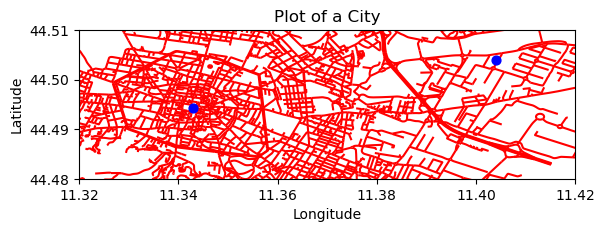

In [24]:
fig, ax = plt.subplots()

# Plot the shapefile
dataset.plot(ax=ax, marker='-', color='red', markersize=0.5, zorder=1)

two_points.plot(ax=ax, marker = 'o', color='blue', markersize=40, zorder=2)

# Customize the plot (optional)
plt.title('Plot of a City')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# Set the x and y axis limits to zoom in on the specified region
ax.set_xlim([11.32, 11.42])
ax.set_ylim([44.48, 44.51])

# Show the plot
plt.show()

Now let's compute the shortest path on the map.

- To do so, we'll need the package `networkx`

In [ ]:
!pip install networkx

In [25]:
import geopandas as gpd
import networkx as nx
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt

# Load the points and lines (assuming you have these as shapefiles or other GeoDataFrame compatible formats)
roads_gdf = gpd.read_file(r'roads/')

We create what is called an empty graphs. In this graph we'll add all our roads to this network

In [26]:
# Create an empty graph
G = nx.Graph()

# Add edges for each line
for idx, line in roads_gdf.iterrows():
    coords = list(line.geometry.coords)
    for i in range(len(coords) - 1):
        G.add_edge(coords[i], coords[i + 1], weight=Point(coords[i]).distance(Point(coords[i + 1])))

Now that I have a graph object, I compute for every point of that graph the distance to point A and the distance to point B

In [27]:
# Find the closest nodes in the graph to the start and end points
start_node = min(G.nodes, key=lambda node: Point(node).distance(point_A))
end_node = min(G.nodes, key=lambda node: Point(node).distance(point_B))

From there, I can take the line that's closest to my point of departure, the one to my point of arrival, and compute the shortest path with weights that correspond to the distance:

- I could also be using weights that depend on the average speed on a road!

In [28]:
# Compute the shortest path
shortest_path = nx.shortest_path(G, source=start_node, target=end_node, weight='weight')

# Convert the shortest path to a LineString for visualization
shortest_path_line = gpd.GeoDataFrame(geometry=[LineString(shortest_path)], crs=roads_gdf.crs)

We can plot what's the shortest path line!

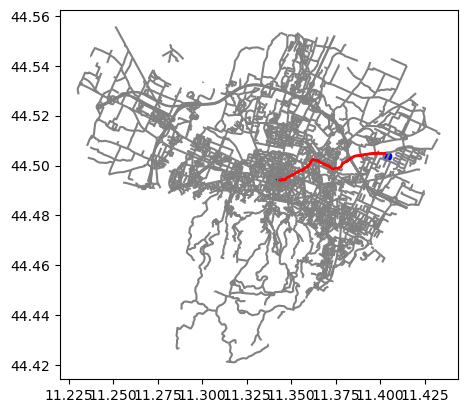

In [29]:
# Plot the results
fig, ax = plt.subplots()
roads_gdf.plot(ax=ax, color='grey')
two_points.plot(ax=ax, color='blue')
shortest_path_line.plot(ax=ax, color='red', linewidth=2)
plt.show()

Let's zoom in our plots

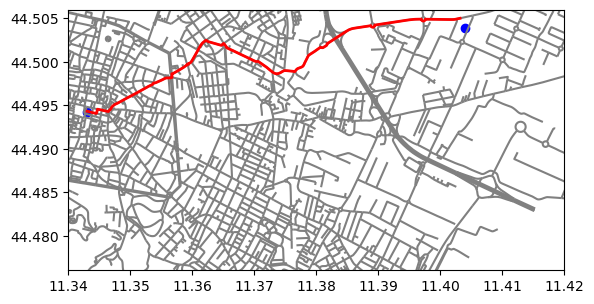

In [31]:
# Define the region to zoom in (longitude and latitude limits)
x_min, x_max = 11.29, 11.37 # Example longitude range
y_min, y_max = 44.476, 44.506    # Example latitude range

# Plot the results
fig, ax = plt.subplots()
roads_gdf.plot(ax=ax, color='grey')
two_points.plot(ax=ax, color='blue')
shortest_path_line.plot(ax=ax, color='red', linewidth=2)

# Set the x and y axis limits to zoom in on the specified region
ax.set_xlim([x_min+0.05, x_max+0.05])
ax.set_ylim([y_min, y_max])

plt.show()

## Before we move on

We've been (knowingly) ignoring a crucial aspect of geographic data:

- Coordinate Reference Systems

We've been ignoring it because it's unbelievably complicated. But we have to know at least a bit about it.

Each shapefile that is properly formatted contains a coordinate reference system.

- There's no use learning their name by heart.

In [32]:
earth1 = gpd.read_file(r'ne_10m_coastline/')
print(earth1.crs)

EPSG:4326


There are many difference coordinate reference systems:

- The way shapes get distorted on a map is arbitrary.
- Some shapes might be restituted better than others - for example the maps we use in Europe usually stretches dimensions as we get closer to the poles

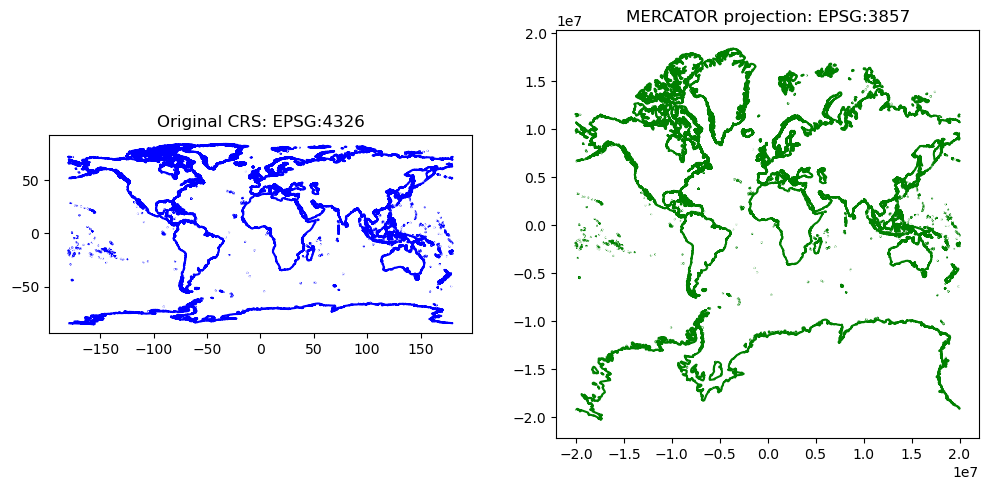

In [35]:
earth2 = earth1.to_crs('EPSG:3857')

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot original data
earth1.plot(ax=ax[0], color='blue', markersize=1)
ax[0].set_title("Original CRS: {}".format(earth1.crs))

# Plot reprojected data
earth2.plot(ax=ax[1], color='green', markersize=1)
ax[1].set_title("MERCATOR projection: {}".format(earth2.crs))

plt.show()

And this can have a lot of importance to care about it.

- Take the point on the map corresponding to Bologna:
    - I write it in the "EPSG:4326"

In [36]:
# Create a GeoDataFrame with two points in EPSG:4326 (WGS 84)
points = gpd.GeoDataFrame({
    'geometry': [Point(11.36081, 44.49300)],
    'name': ['Point A']
}, crs='EPSG:4326')

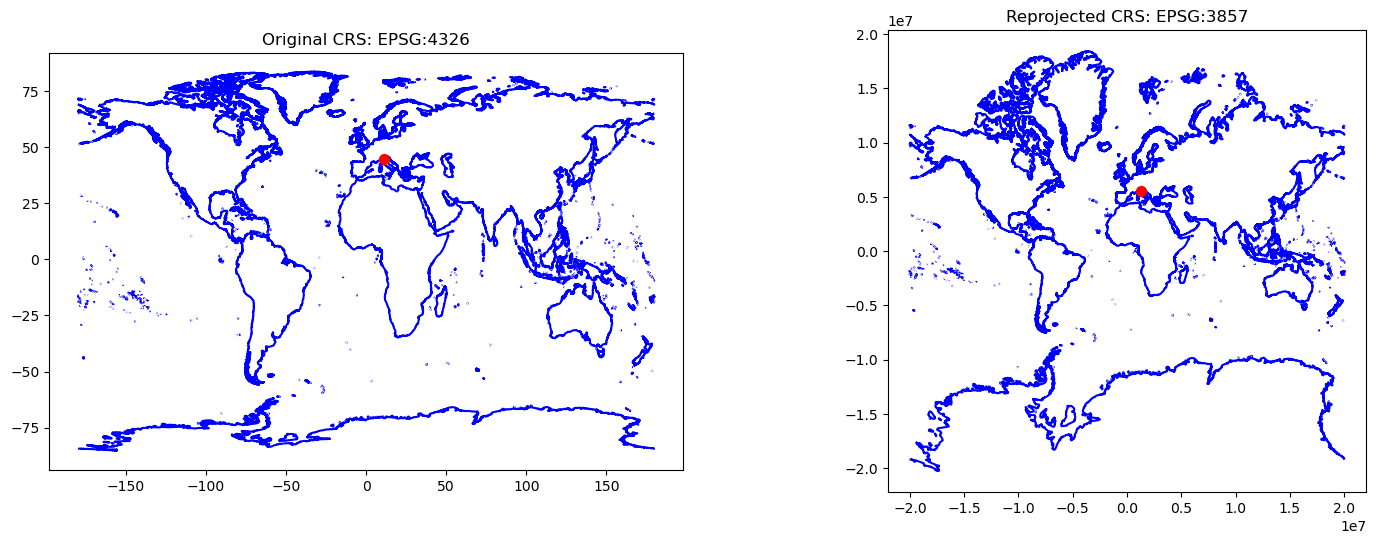

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plot original data
earth1.plot(ax=ax[0], color='blue', markersize=1, zorder = 1)
points.plot(ax=ax[0], color='red', markersize=50, zorder = 2)
ax[0].set_title("Original CRS: EPSG:4326")


points_correct =points.to_crs("EPSG:3857")
# Plot reprojected data (EPSG:3857)
earth2.plot(ax=ax[1], color='blue', markersize=1, zorder = 1)
points_correct.plot(ax=ax[1], color='red', markersize=50, zorder = 2)
ax[1].set_title("Reprojected CRS: EPSG:3857")


plt.show()

## Polygon data

Most of the time, in applications related to economics, we'll be using polygon data.

Let's use one you're familiar with: the NUTS2 polygons.

- The data is actually a json file, not a geojson:
    - The CRS is not specify at base. You need to know it and assign it

In [38]:
# Import the json file
nuts2 = gpd.read_file('nutsrg_2.json')
# Specify the crs
nuts2.crs = 'EPSG:3857'

print(nuts2)

       id                 na  \
0    DE50             Bremen   
1    DE60            Hamburg   
2    DE71          Darmstadt   
3    DE72             Gießen   
4    DE73             Kassel   
..    ...                ...   
323  HR06  Sjeverna Hrvatska   
324  NO02          Innlandet   
325  NO06          Trøndelag   
326  NO07         Nord-Norge   
327  NO08      Oslo og Viken   

                                              geometry  
0    MULTIPOLYGON (((963388.000 7003043.000, 958988...  
1    MULTIPOLYGON (((1087394.000 7077204.000, 10869...  
2    POLYGON ((1033792.000 6522170.000, 1038192.000...  
3    POLYGON ((1018591.000 6592427.000, 1045792.000...  
4    POLYGON ((1071794.000 6724745.000, 1071794.000...  
..                                                 ...  
323  POLYGON ((1905835.000 5761827.000, 1892235.000...  
324  POLYGON ((1410611.000 8638872.000, 1362208.000...  
325  MULTIPOLYGON (((1594620.000 9639652.000, 15214...  
326  MULTIPOLYGON (((3121896.000 11064318.000

Let's plot our NUTS2

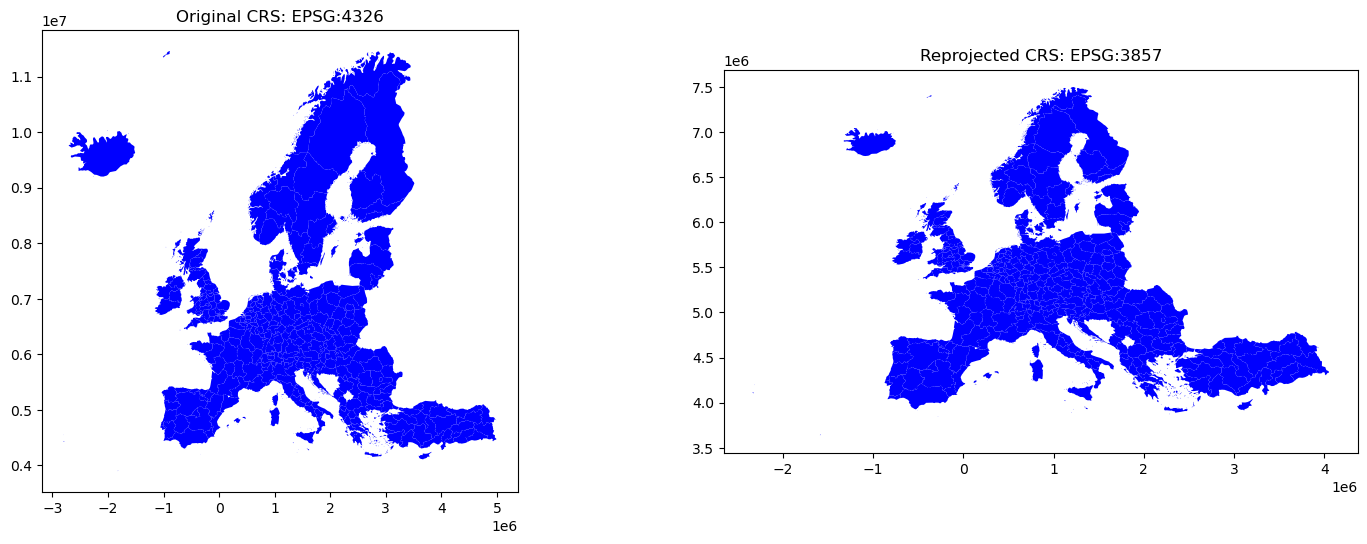

In [40]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

nuts22 = nuts2.to_crs("+proj=laea +x_0=0 +y_0=0 +lon_0=0 +lat_0=0")

# Plot original data
nuts2.plot(ax=ax[0], color='blue', markersize=1, zorder = 1)
ax[0].set_title("Original CRS: EPSG:4326")

# Plot reprojected data (EPSG:3857)
nuts22.plot(ax=ax[1], color='blue', markersize=1, zorder = 1)
ax[1].set_title("Reprojected CRS: EPSG:3857")


plt.show()

Now, since this works like a `pandas`, we can do a lot of cool stuff with this data: for example let's take our data on regional inequality.

In [41]:
import pandas as pd
# Import relevant packages
gdp_per_capita = pd.read_csv('gdp_per_capita.csv')
print(gdp_per_capita)

    country   geo                            nuts_2  gdp_per_cap  \
0        AL  AL01                              Veri     0.003624   
1        AL  AL02                            Qender     0.005473   
2        AL  AL03                               Jug     0.004054   
3        AT  AT11                        Burgenland     0.030758   
4        AT  AT12                  Niederösterreich     0.036336   
..      ...   ...                               ...          ...   
285      TR  TRB1  Malatya, Elazığ, Bingöl, Tunceli     0.005324   
286      TR  TRB2         Van, Muş, Bitlis, Hakkari     0.003489   
287      TR  TRC1        Gaziantep, Adıyaman, Kilis     0.006042   
288      TR  TRC2             Şanlıurfa, Diyarbakır     0.003563   
289      TR  TRC3     Mardin, Batman, Şırnak, Siirt     0.004472   

              pop  weighted_avg_gdp_per_cap  
0    8.185263e+05                  0.004505  
1    1.157351e+06                  0.004505  
2    8.859667e+05                  0.004505  

Let's compute the GDP per capita deviation of a region, and plot all the nuts2 regions according to how bad they differ from the average (in positive or negative)

In [48]:
# Compute the absolute deviation to the average
gdp_per_capita['deviation'] = gdp_per_capita['gdp_per_cap']/gdp_per_capita['weighted_avg_gdp_per_cap']

Now we can merge that dataset with our previous one

In [49]:
to_plot = pd.merge(nuts2, gdp_per_capita, how = 'left', left_on = 'id', right_on = 'geo')

Create a colour map for our shaded plot

In [50]:
import matplotlib.colors as mcolors

# Define a custom diverging colormap (blue for negative, red for positive)
cmap = plt.get_cmap('coolwarm')

# Normalize the data to center at 0 (diverging colormap)
norm = mcolors.TwoSlopeNorm(vmin=to_plot['deviation'].min(), vcenter=1, vmax=to_plot['deviation'].max())

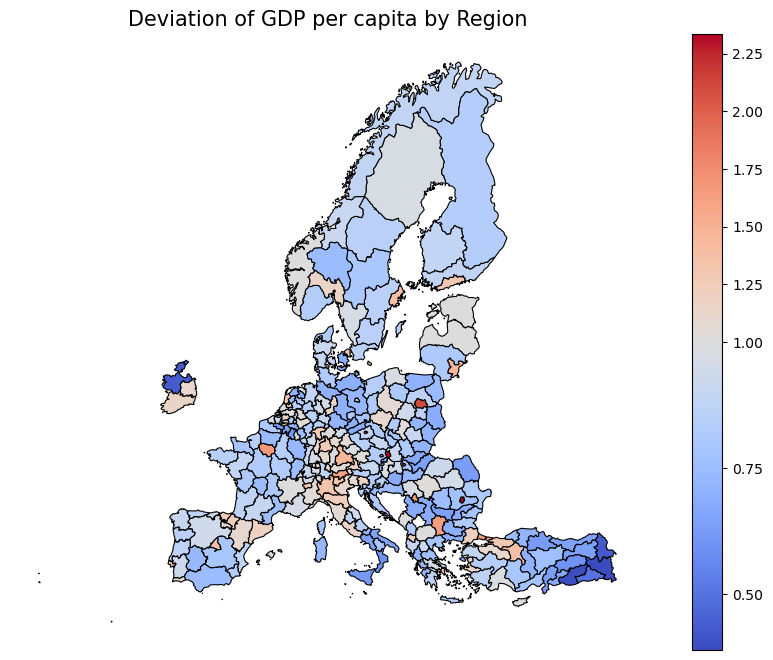

In [51]:
# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the GeoDataFrame
to_plot.plot(column='deviation', cmap=cmap, norm=norm, linewidth=0.8, edgecolor='black', ax=ax)

# Add a colorbar
# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set the array to empty as the data is already in the plot
cbar = plt.colorbar(sm, ax=ax)

# Customize the plot (optional)
ax.set_title('Deviation of GDP per capita by Region', fontsize=15)
ax.set_axis_off()

# Show the plot
plt.show()

We've manipulated geographical data together with pandas. But what about other types of interactions between vectors?

- Vectors allow for very diverse operations:
    - Merge geopandas according to their geographical coordinates
    - Overlay points and polygons
    - Merge polygons
    
For example in the map we just made, the borders of the countries are not easy to distinguish. We can make them appear.

We dissolve polygons together to get the polygons of countries.

- Then we want to underline the borders of the countries, so we take the boundaries of the polygons

In [59]:
countries = to_plot[['country', 'geometry']].dissolve(by='country')
countries['geometry'] = countries.boundary

We can now overlay the two plots to better distinguish countries borders

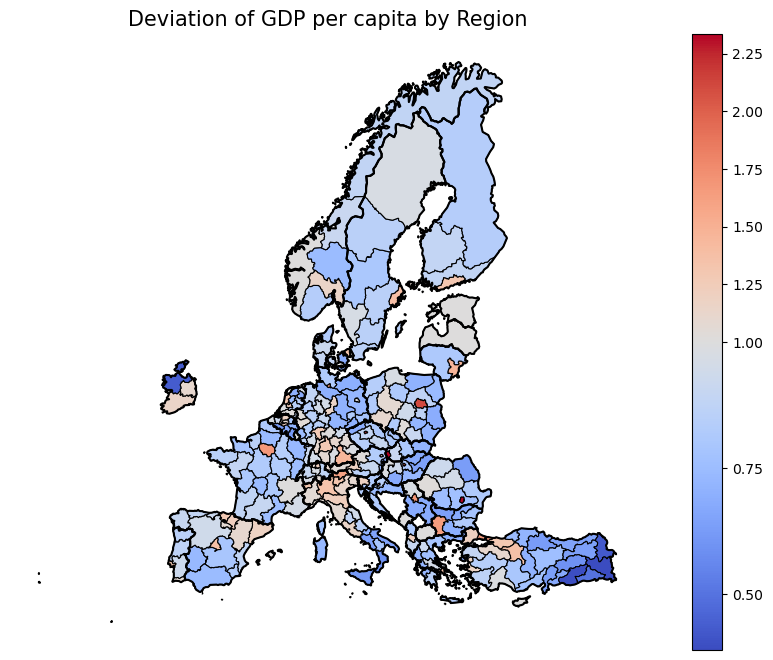

In [108]:
# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the GeoDataFrame
to_plot.plot(column='deviation', cmap=cmap, norm=norm, linewidth=0.8, edgecolor='black', ax=ax, zorder = 1)
countries.plot(ax=ax, color='black', markersize=1, zorder = 2)
# Add a colorbar
# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set the array to empty as the data is already in the plot
cbar = plt.colorbar(sm, ax=ax)

# Customize the plot (optional)
ax.set_title('Deviation of GDP per capita by Region', fontsize=15)
ax.set_axis_off()

# Show the plot
plt.show()

## Raster data

Vector data is amazing:

- It's lightweight on your computer.
- It's easy to use, hard to make a mistake when it comes to projection.

But...

- It's not adapted to many types of data.

What if the data you want to study is "continuous"?

Many types of data are almost continuous (in the way we capture them):

- Environmental data:
    - Temperature.
    - Pollution.
    - Precipitations.
- Visual data:
    - Satellite Images
    - Nightlights

### Why "Almost" Continuous?

Because geographical data is composed of pixels:

- You have to think of a map as an image, and an image as pixels

Then the size of those pixels determines how "continuous" the data is, it is called the `resolution`.

An image is nothing more than a matrix of numbers, interpreted into quantities of colours to mix together

In [52]:
# To load the matrix back
matrix = np.load('matrix.npy')
print(matrix*1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


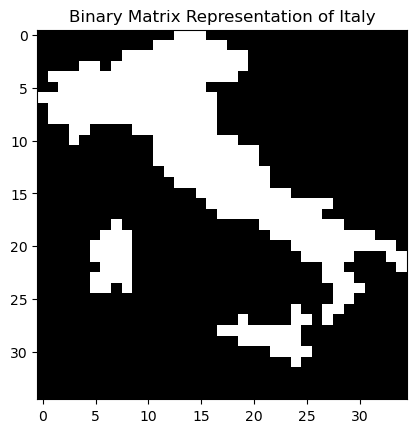

In [53]:
# Plot the binary matrix
plt.imshow(matrix, cmap='gray')
plt.title('Binary Matrix Representation of Italy')
plt.show()

The matrix of number becomes a map once:

- You assign to it a resolution
- You create `metadata` on what's the size of a pixel on the map:
    - In kilometers for example.
    - In `degrees` would be another unit of measure.
    
Let's try it out.

In [ ]:
!pip install rasterio

First we define the geographical point where our raster starts (the upper-left by convention)

In [54]:
# Define the upper-left corner coordinates
upper_left_x = 6.439538729773018
upper_left_y = 47.8

Then we define the resolution

In [55]:
# Define the resolution (cell size)
resolution_x = .35  # example resolution in degrees
resolution_y = .35  # example resolution in degrees

In [60]:
import numpy as np
import rasterio
from rasterio.transform import from_origin
from rasterio.io import MemoryFile

crs = "EPSG:4326"

# Calculate the affine transform
transform = from_origin(upper_left_x, upper_left_y, resolution_x, resolution_y)

# Define the metadata
meta = {
    'driver': 'GTiff',
    'height': matrix.shape[0],
    'width': matrix.shape[1],
    'count': 1,  # number of bands
    'dtype': matrix.dtype,
    'crs': crs,
    'transform': transform
}

# Write the matrix to a raster file
with rasterio.open('output_raster.tif', 'w', **meta) as dst:
    dst.write(matrix, 1)


CPLE_AppDefinedError: Deleting output_raster.tif failed: Permission denied

Now let's plot our raster next to our vector data

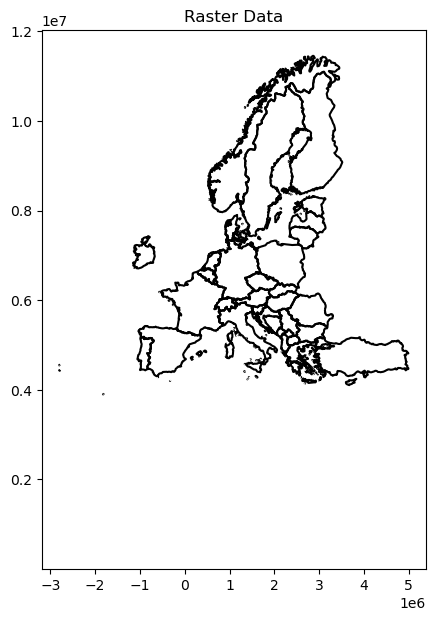

In [61]:
import rasterio.plot as rioplot

raster = rasterio.open("output_raster.tif")

fig, ax = plt.subplots(figsize=(14, 7))

# Plot the raster
rioplot.show(raster, ax=ax, zorder= 2)
countries.plot(ax=ax, edgecolor='black', zorder = 1)
ax.set_title('Raster Data')
plt.show()

CHECK THE CRS!

In [62]:
countries.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [63]:
raster.crs

CRS.from_epsg(4326)

When you need to adjust crs, always adjust the one of the vector

In [64]:
countries = countries.to_crs('EPSG:4326')

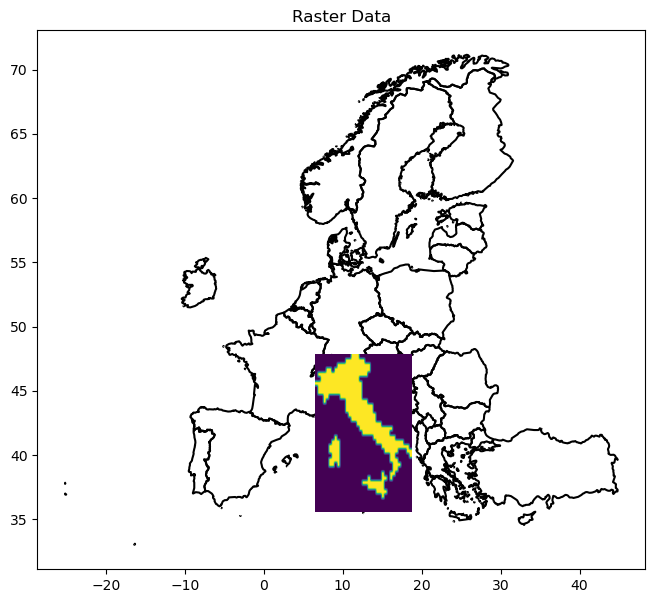

In [65]:
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the raster
rioplot.show(raster, ax=ax, zorder= 2)
countries.plot(ax=ax, edgecolor='black', zorder = 1)
ax.set_title('Raster Data')
plt.show()

It's ugly, but it works. Let's make the raster a bit different so we see what's going on.

- Let's make the 0 part of our raster invisible
- Let's make the 1 part of our raster a bit transparent

In [66]:
from matplotlib.colors import ListedColormap
# Create a colormap with transparency
# Value 1 will have an alpha of 0.5, and value 0 will be fully transparent
colors = [(0, 0, 0, 0), (1, 0, 0, 0.5)]  # Black fully transparent, red with alpha 0.5
cmap = ListedColormap(colors)

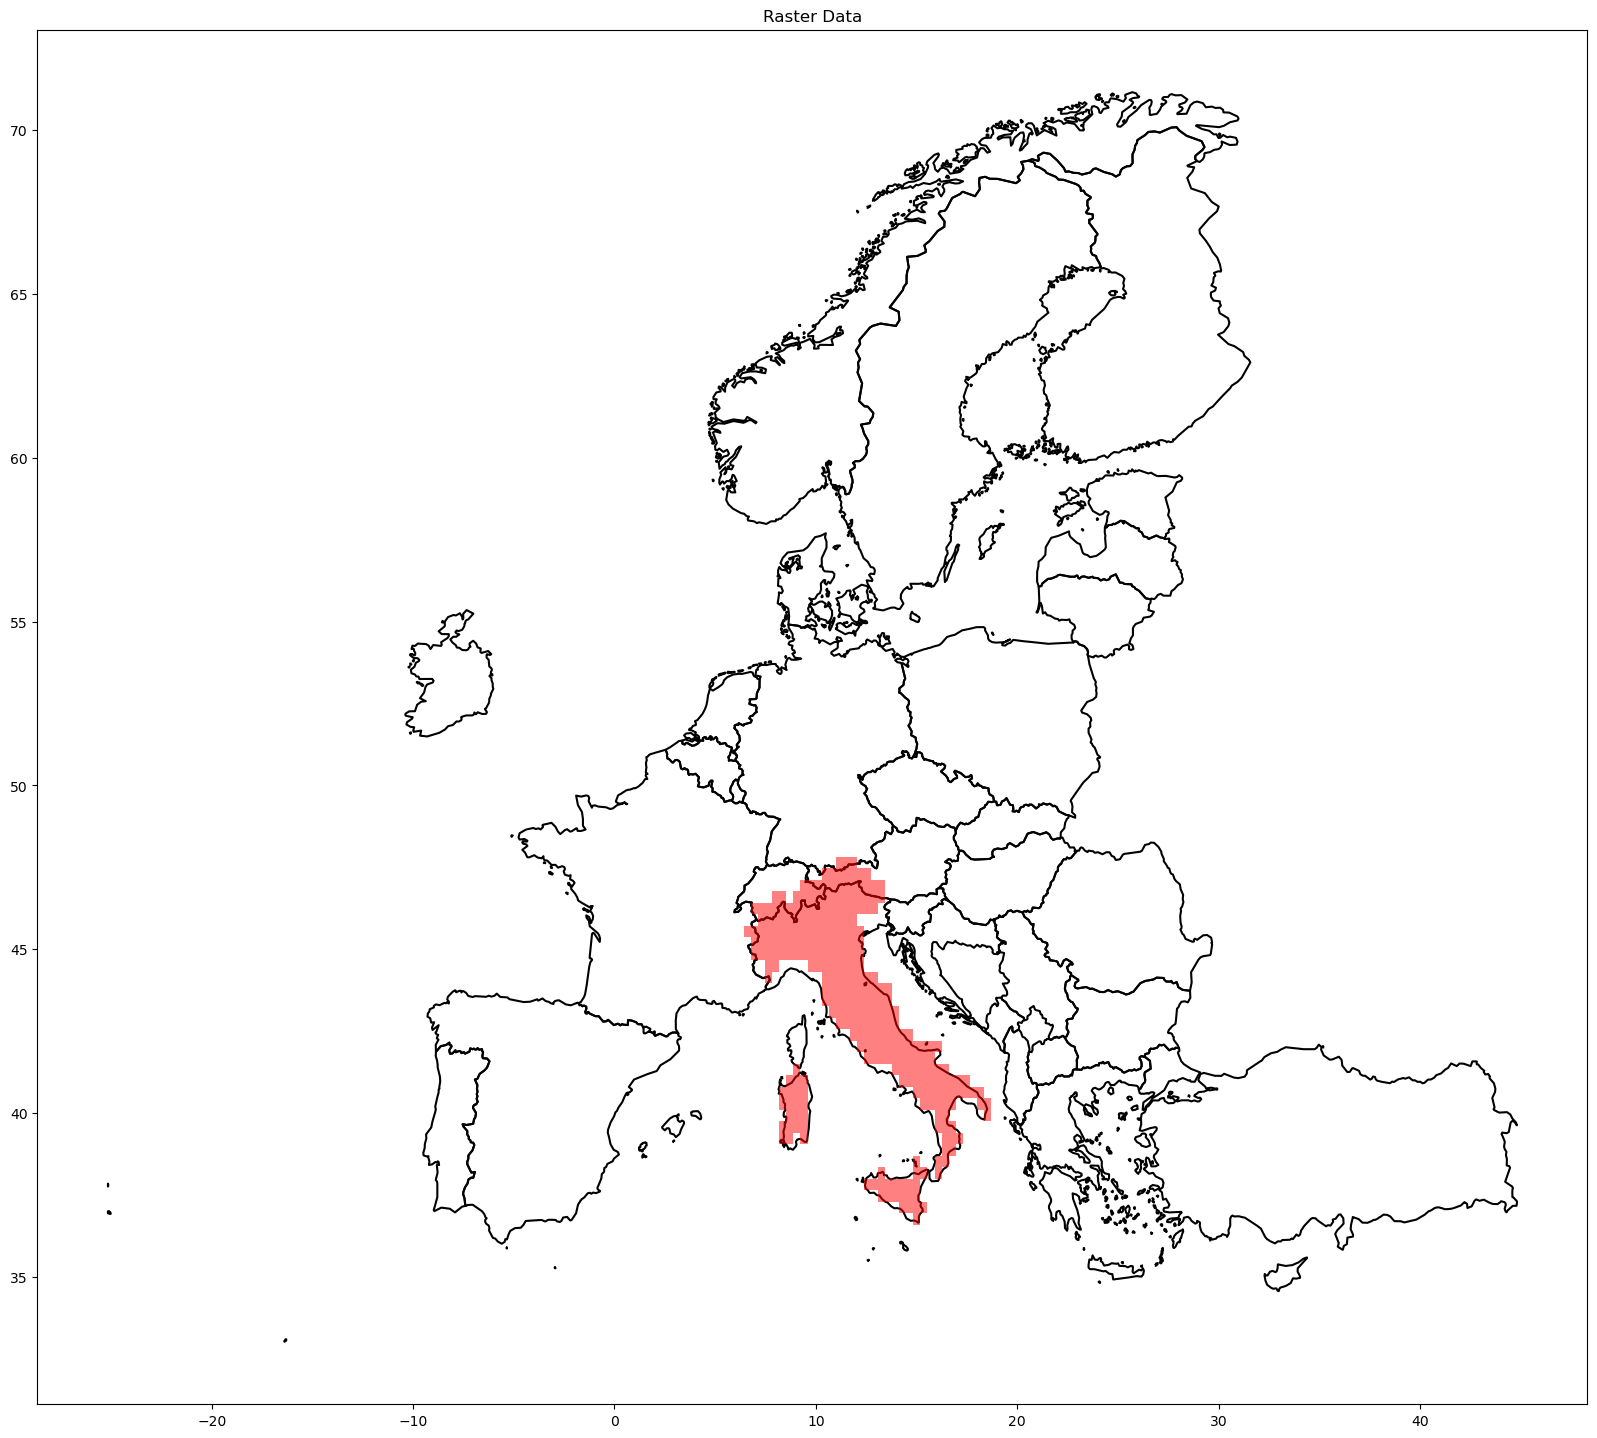

In [67]:
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the raster
rioplot.show(raster, ax=ax, zorder= 2, cmap = cmap)
countries.plot(ax=ax, edgecolor='black', zorder = 1)
ax.set_title('Raster Data')
plt.show()

Why am I showing you this?

- You need to understand that raster, or "continuous" data is nothing more than:
    - a matrix of number
    - the starting point on a map (upper-left corner)
    - how many kilometers each number of your matrix represents
    - the projection

Understanding this will make your life easier.

One more time, let's understand this in more details.

When we save the raster: we can slightly modify some values, for example let's modify origin point

In [68]:
transform = from_origin(upper_left_x, upper_left_y + 5, resolution_x, resolution_y)

# Define the metadata
meta = {
    'driver': 'GTiff',
    'height': matrix.shape[0],
    'width': matrix.shape[1],
    'count': 1,  # number of bands
    'dtype': matrix.dtype,
    'crs': crs,
    'transform': transform
}

# Write the matrix to a raster file
with rasterio.open('output_raster_wrong.tif', 'w', **meta) as dst:
    dst.write(matrix, 1)

Let's look at it now

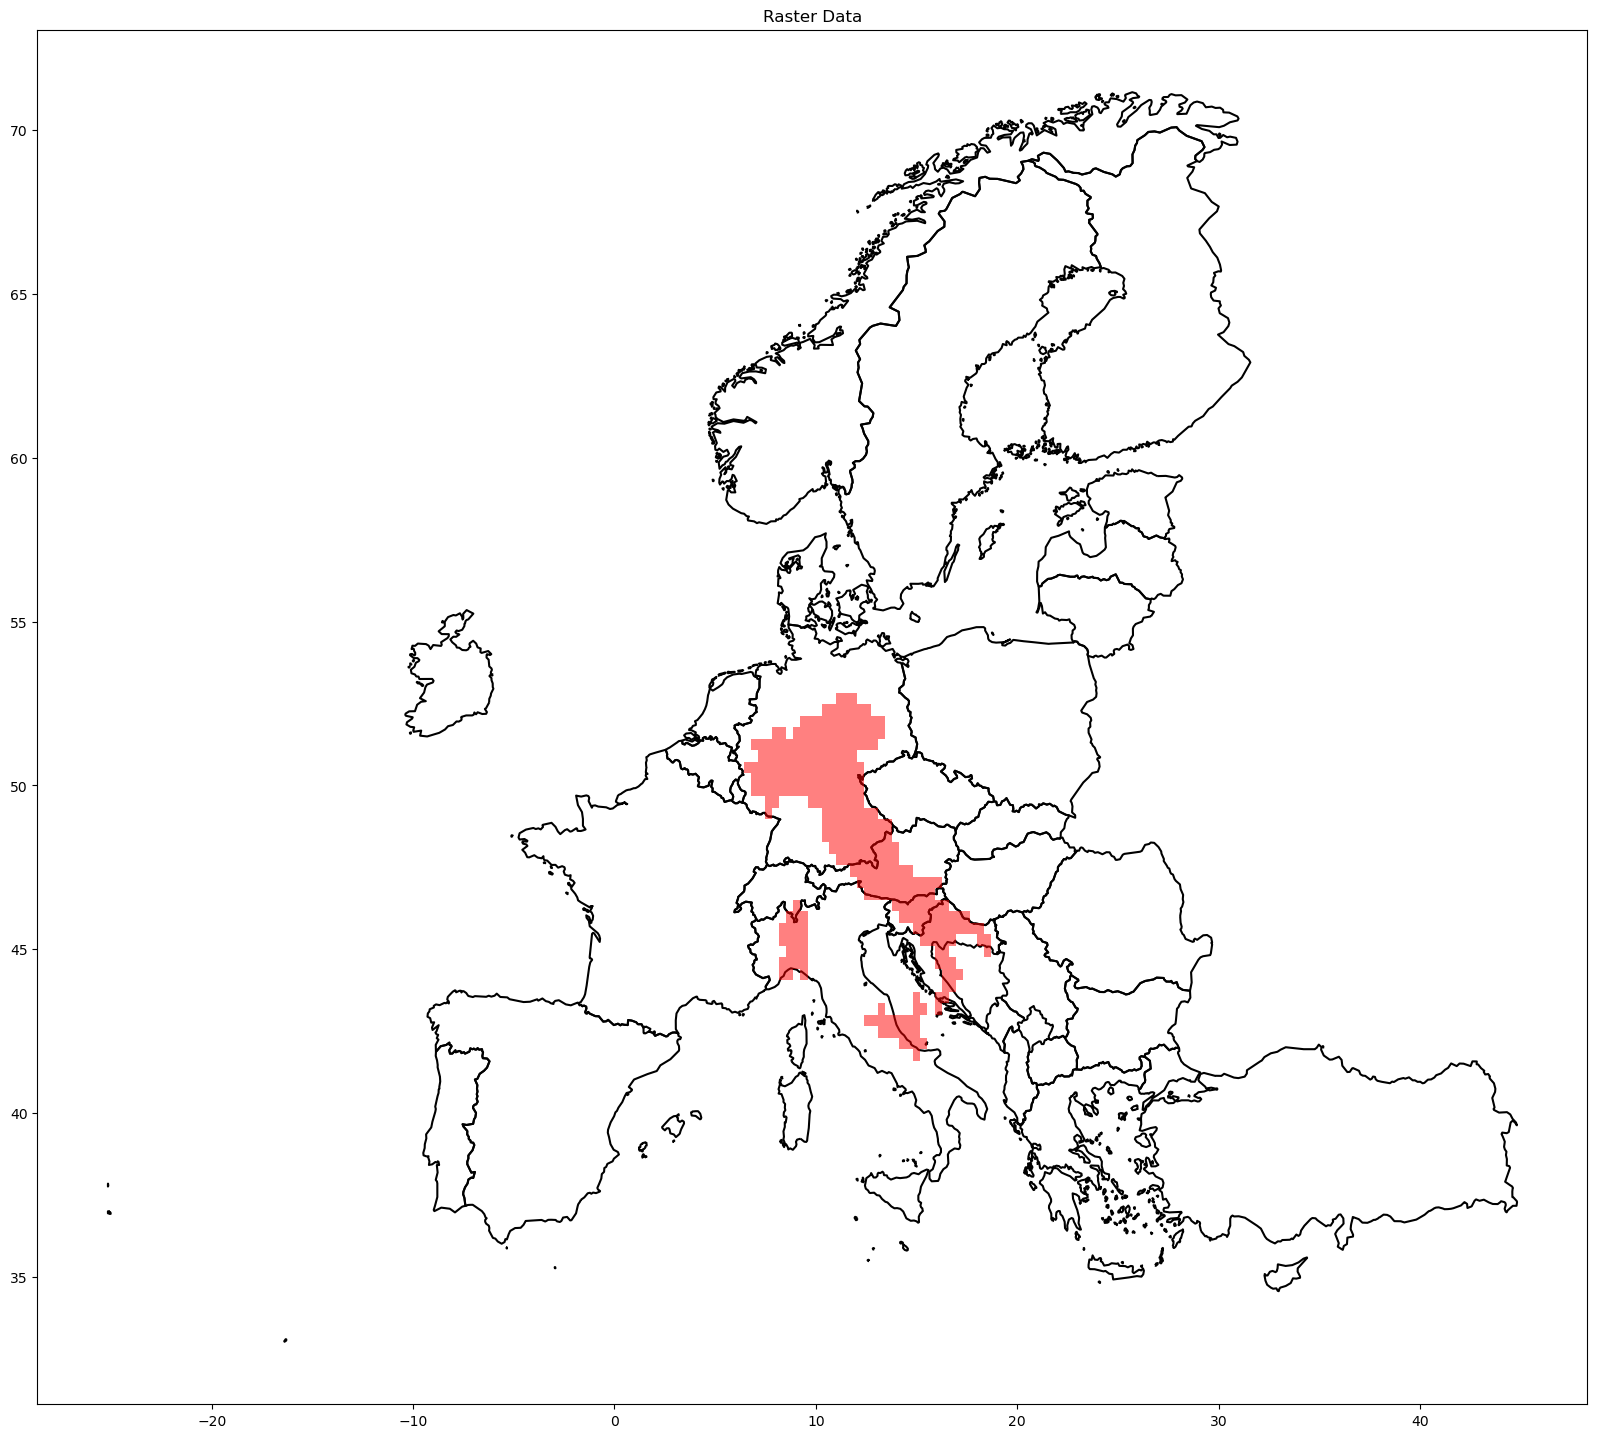

In [69]:
# Wrong raster
wrong_raster = rasterio.open('output_raster_wrong.tif')

fig, ax = plt.subplots(figsize=(20, 20))

# Plot the raster
rioplot.show(wrong_raster, ax=ax, zorder= 2, cmap = cmap)
countries.plot(ax=ax, edgecolor='black', zorder = 1)
ax.set_title('Raster Data')
plt.show()

Raster data offers the possibility to study environment data and the impact of man-made changes to nature:

- Environmental data (Since 1940 hourly worldwide data!!!) (https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview)
- Nightlight data (https://ngdc.noaa.gov/eog/data/web_data/v4composites/)
- Urban area classification (Machine Learning) (NASA satellite images from Glovis)

In [70]:
import rasterio
# Take the nightlight data
nightlight_1992 = rasterio.open('nightlight/raw/F101992.v4b_web.stable_lights.avg_vis.tif')

Let's plot it.

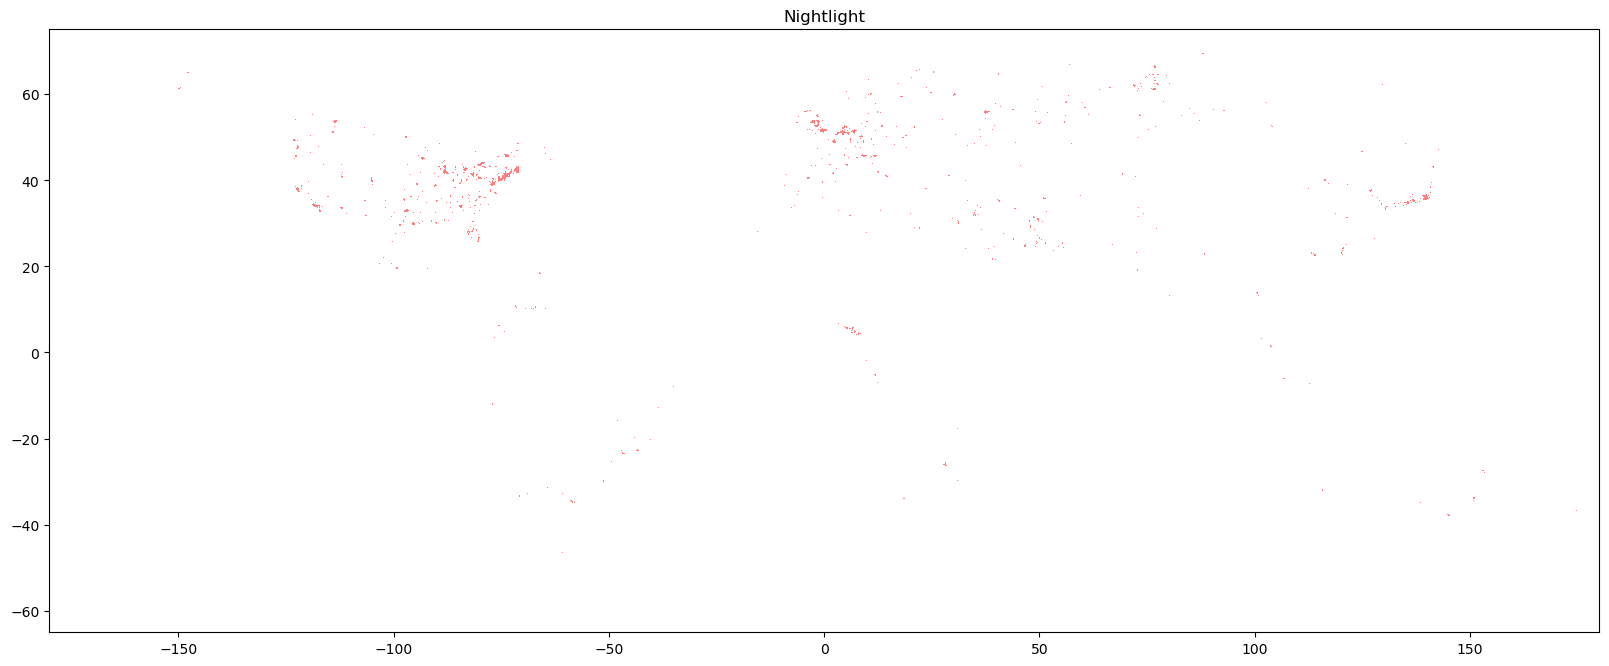

In [71]:
import rasterio.plot as rioplot

fig, ax = plt.subplots(figsize=(20, 20))

# Plot the raster
rioplot.show(nightlight_1992, ax=ax)
ax.set_title('Nightlight')
plt.show()

This is one biiiig dataset.

- We need to `crop` it. Restrict it to the area we are interested in.

Let's have a look at Pakistan, Nepal, India, Bhutan, Sri Lanka and Bangladesh for a change.

Cropping a dataset is restricting that dataset to a certain geographical area. We need the coordinates of the box we want to crop. Who says `coordinates` says `crs`

In [12]:
print(nightlight_1992.crs)

EPSG:4326


Take four informations:

- Upper coordinate
- Lower coordinate
- Eastmost
- Westmost

In [73]:
geo

geometry
0  POLYGON ((93.00000 4.00000, 93.00000 38.00000,...

In [72]:
from shapely.geometry import box
north_coord = 38
east_coord = 93
south_coord = 4
west_coord = 60

# Create a bounding box using shapely
bounding_box = box(west_coord, south_coord, east_coord, north_coord)

# Convert the bounding box to a GeoDataFrame
geo = gpd.GeoDataFrame({'geometry': bounding_box}, index=[0], crs='EPSG:4326')

Now that we have a bounding box, we want to apply the bounding box to our raster

In [74]:
from rasterio.mask import mask

# Read the raster file
out_image, out_transform = mask(nightlight_1992, geo.geometry, crop=True)

Now we update the metadata

In [75]:
new_metadata = nightlight_1992.meta.copy()
# Update the metadata with the new dimensions and transform
new_metadata.update({
    "driver": "GTiff",
    "height": out_image.shape[1],
    "width": out_image.shape[2],
    "transform": out_transform
})

Finally we save our raster data

In [76]:
# Save the cropped raster to a new file
cropped_raster_path = 'nightlight/1992_cropped.tif'
with rasterio.open(cropped_raster_path, 'w', **new_metadata) as dest:
    dest.write(out_image)

print(f"Cropped raster saved to {cropped_raster_path}")

Cropped raster saved to nightlight/1992_cropped.tif


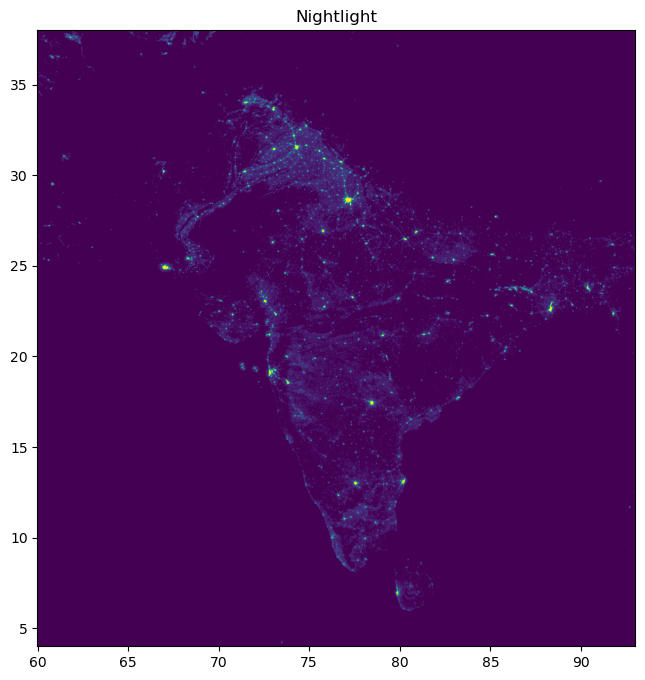

In [77]:
fig, ax = plt.subplots(figsize=(8, 8))
nightlight_1992 = rasterio.open('nightlight/1992_cropped.tif')
# Plot the raster
rioplot.show(nightlight_1992, ax=ax)
ax.set_title('Nightlight')
plt.show()

For those of use not used to seeing South Asia (a lot of us?)

- Let's add some additional information on this graph:
    - country borders
    - some dots for the big cities and their names (although this is the one thing we do understand)

Import a file that contains the countries boundaries (don't forget to look at the crs)

In [82]:
country_boundaries = gpd.read_file('world-administrative-boundaries/world-administrative-boundaries.shp')
country_boundaries.head()

iso3        status color_code                                        name  \
0   UGA  Member State        UGA                                      Uganda   
1   UZB  Member State        UZB                                  Uzbekistan   
2   IRL  Member State        IRL                                     Ireland   
3   ERI  Member State        ERI                                     Eritrea   
4  None  UK Territory        GBR  South Georgia & the South Sandwich Islands   

    continent           region iso_3166_1_  \
0      Africa   Eastern Africa          UG   
1        Asia     Central Asia          UZ   
2      Europe  Northern Europe          IE   
3      Africa   Eastern Africa          ER   
4  Antarctica             None        None   

                                  french_shor  \
0                                     Ouganda   
1                                 Ouzbékistan   
2                                     Irlande   
3                                    Érythrée   
4  South Georgia & the South Sandwich Islands   

                                            geometry  
0  POLYGON ((33.92110 -1.00194, 33.92027 -1.00111...  
1  POLYGON ((70.97081 42.25467, 70.98054 42.26205...  
2  MULTIPOLYGON (((-9.97014 54.02083, -9.93833 53...  
3  MULTIPOLYGON (((40.13583 15.75250, 40.12861 15...  
4  MULTIPOLYGON (((-26.24361 -58.49473, -26.24889...

In [79]:
print(country_boundaries.crs)

EPSG:4326


The CRS is fine, but its a dataset of polygons, we prefer one of lines since we don't want to obstruct the raster data

In [80]:
country_boundaries['geometry'] = country_boundaries.boundary
print(country_boundaries)

     iso3                           status color_code  \
0     UGA                     Member State        UGA   
1     UZB                     Member State        UZB   
2     IRL                     Member State        IRL   
3     ERI                     Member State        ERI   
4    None                     UK Territory        GBR   
..    ...                              ...        ...   
251   BEL                     Member State        BEL   
252   WSM                     Member State        WSM   
253   AIA  UK Non-Self-Governing Territory        AIA   
254   ISR                     Member State        ISR   
255   LBY                     Member State        LBY   

                                           name   continent           region  \
0                                        Uganda      Africa   Eastern Africa   
1                                    Uzbekistan        Asia     Central Asia   
2                                       Ireland      Europe  Northern Europ

We can now overlay our plots!

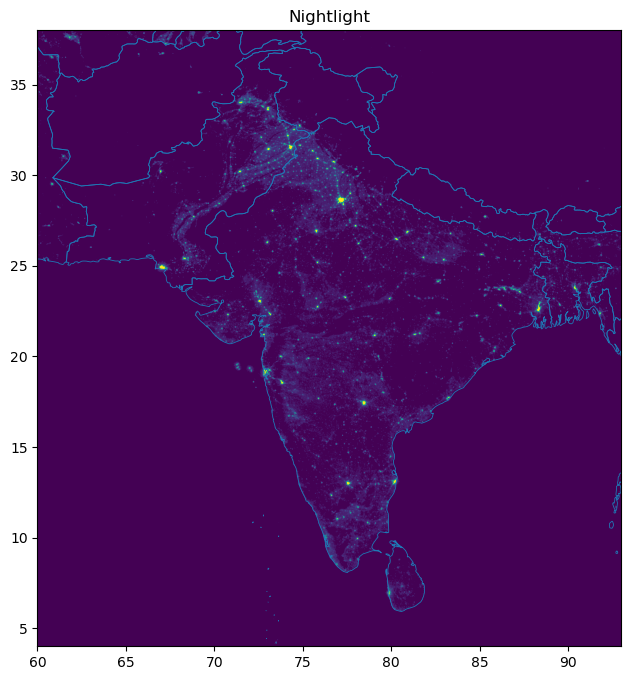

In [81]:
fig, ax = plt.subplots(figsize=(8, 8))
nightlight_1992 = rasterio.open('nightlight/1992_cropped.tif')
# Plot the raster
rioplot.show(nightlight_1992, ax=ax, zorder= 1)
country_boundaries.plot(ax = ax, zorder = 2, linewidth = 0.6)
ax.set_title('Nightlight')
ax.set_xlim([60, 93])
ax.set_ylim([4, 38])
plt.show()

This is starting to be clear, let's add the most populous cities on that map

In [83]:
# Take the dataset of cities, and highlight the ones that are very populous
dataset = gpd.read_file(r"cities/")
dataset = dataset.loc[dataset['POP_MAX'] > 2_000_000]

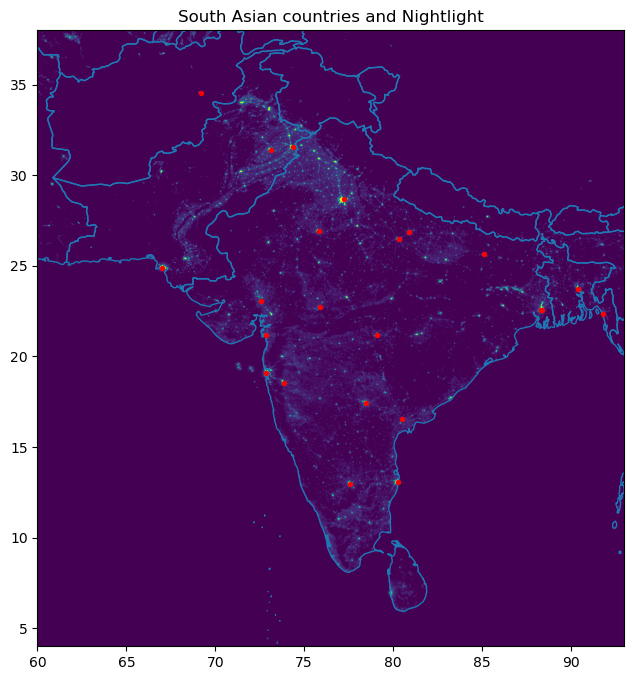

In [60]:
fig, ax = plt.subplots(figsize=(8, 8))
nightlight_1992 = rasterio.open('nightlight/1992_cropped.tif')
# Plot the raster
rioplot.show(nightlight_1992, ax=ax, zorder= 1)
country_boundaries.plot(ax = ax, zorder = 2, linewidth = 1)
dataset.plot(ax = ax, zorder = 2, marker = 'o', markersize = 8, color = "red")
ax.set_title('South Asian countries and Nightlight')
ax.set_xlim([60, 93])
ax.set_ylim([4, 38])
plt.show()

Researchers have successfully used nightlights for a lot of very nice application:

- High frequency economic data: you observe it every night!
- Continuous data: you're able to measure economic development at a very fine grain level!

Let's have a bit of fun and look at economic development in South Asia from 1992 to 2013.

In the `raw` subfolder in the `nightlight` folder, you'll find 5 observations for nightlights around the world:

- Crop the data for south Asia (or the region of your choice)
- Create a gif chaining all the nightlight data

Let's import the names of our nightlight data

In [86]:
import os

list_of_nightlight_data = os.listdir('nightlight/raw')
print(list_of_nightlight_data)

['F101992.v4b_web.stable_lights.avg_vis.tif', 'F121997.v4b_web.stable_lights.avg_vis.tif', 'F142000.v4b_web.stable_lights.avg_vis.tif', 'F162006.v4b_web.stable_lights.avg_vis.tif', 'F182013.v4c_web.stable_lights.avg_vis.tif']


We crop each of them as we did before for the 1992 one

In [67]:
for file in list_of_nightlight_data[1:]:
    year = file[3:7]
    # Open the file
    nightlight_raw_rast = rasterio.open(f"nightlight/raw/{file}")
    
    # Crop it
    out_image, out_transform = mask(nightlight_raw_rast, geo.geometry, crop=True)
    
    # Adjust the metadata
    new_metadata = nightlight_1992.meta.copy()
    # Update the metadata with the new dimensions and transform
    new_metadata.update({
        "driver": "GTiff",
        "height": out_image.shape[1],
        "width": out_image.shape[2],
        "transform": out_transform
    })
    
    # Save it
    cropped_raster_path = f'nightlight/{year}_cropped.tif'
    with rasterio.open(cropped_raster_path, 'w', **new_metadata) as dest:
        dest.write(out_image)
    

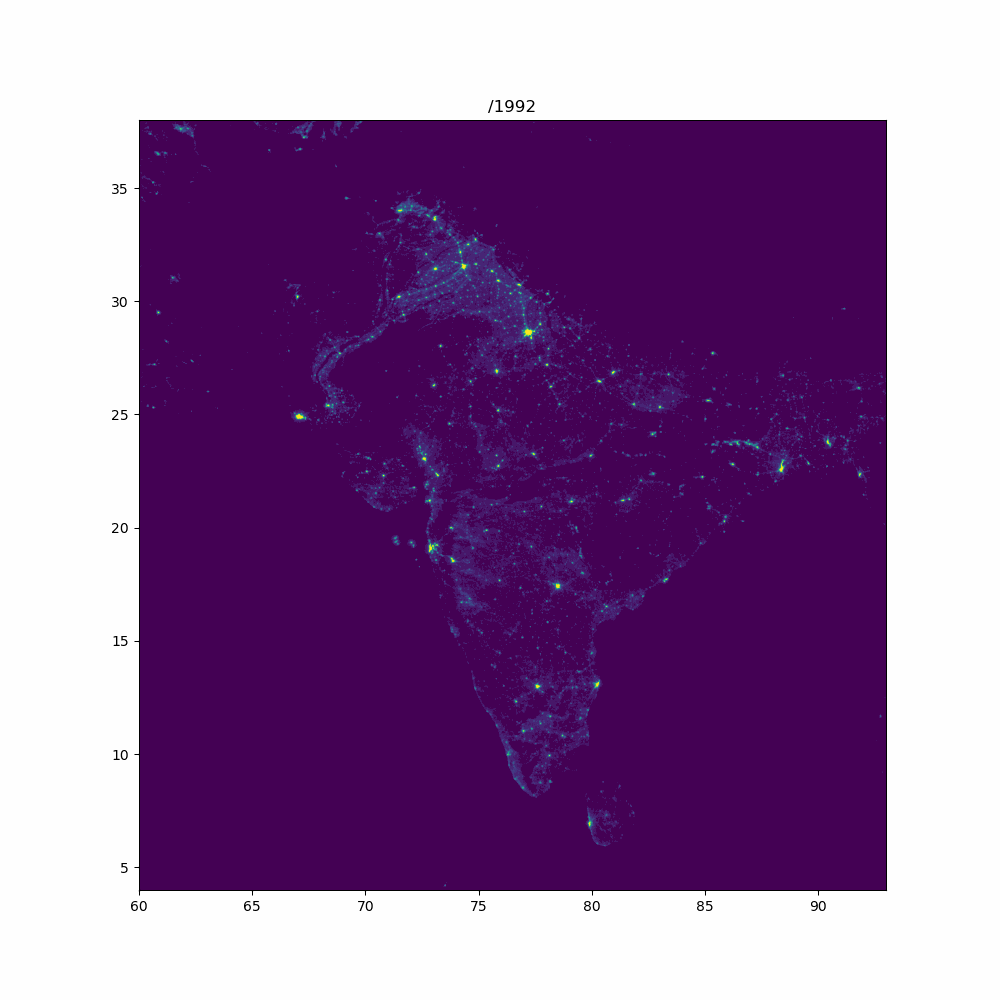

In [93]:
import rasterio
import matplotlib.pyplot as plt
import imageio
from IPython.display import Image

# Define the paths to your TIFF files
tif_files = ["nightlight/1992_cropped.tif", "nightlight/1997_cropped.tif", "nightlight/2000_cropped.tif",
            "nightlight/2006_cropped.tif", "nightlight/2013_cropped.tif"]

# List to store the file paths of the generated PNG files
png_files = []

for i, tif in enumerate(tif_files):
    with rasterio.open(tif) as src:
        fig, ax = plt.subplots(figsize=(10, 10))
        rasterio.plot.show(src, ax=ax)
        plt.title(tif[11:15])
        png_file = f"plot_{i}.png"
        plt.savefig(png_file)
        png_files.append(png_file)
        plt.close()

# Create a GIF from the PNG files
gif_path = 'animation.gif'
with imageio.v2.get_writer(gif_path, mode='I', duration=1000, loop = 0) as writer:
    for png_file in png_files:
        image = imageio.v2.imread(png_file)
        writer.append_data(image)

# Display the GIF in the Jupyter Notebook
Image(filename=gif_path)

More importantly for us, we can aggregate raster data at the vector level:

- Track the growth of light by administrative unit.
- For example, let's do India

Always start by looking at the crs

In [97]:
# Let's get those and print them on the map
india_boundaries = gpd.read_file('india_boundaries/')
print(india_boundaries.crs)

EPSG:3857


Let's take a look at this shapefile

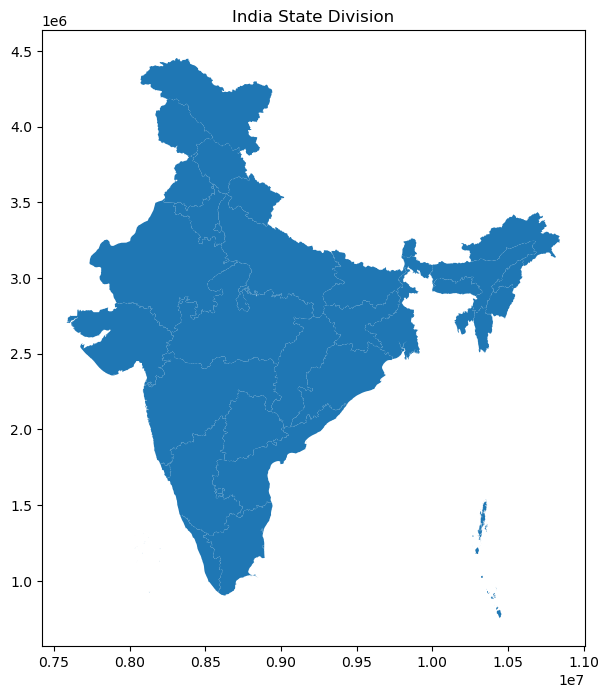

In [98]:
fig, ax = plt.subplots(figsize=(8, 8))
# Plot the raster
india_boundaries.plot(ax = ax, zorder = 2, linewidth = 1)
ax.set_title('India State Division')
plt.show()